# Introduction

This notebook illustrates how the generalized p-means work (specifically geometric vs. arithmetic vs. harmonic means). The generalized p-mean can be formulated as follows:

$M_p(x_1,...,x_n) = \left( \frac{1}{n} \sum_{i=1}^n x_i^p \right)^{1/p}$

Popular cases:
* p=-1 - harmonic mean
* p=0 - geometric mean
* p=1 - arithmetic mean

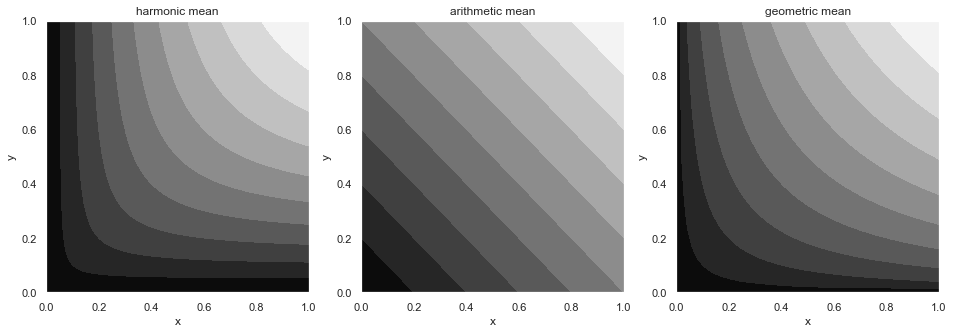

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
sns.set_theme()
from functools import partial
from scipy.stats import hmean
x = np.linspace(0,1)
y = np.linspace(0,1)

def p_mean(a,b,p):
    if np.isclose(p, 0):
        return np.sqrt(a*b)
    with np.errstate(divide='ignore'):
        return ((a**p + b**p)/2)**(1/p)
    

harmonic_mean = partial(p_mean, p=-1)
harmonic_mean.__name__ = 'harmonic mean'
arithmetic_mean = partial(p_mean, p=1)
arithmetic_mean.__name__ = 'arithmetic mean'
geometric_mean = partial(p_mean, p=0)
geometric_mean.__name__ = 'geometric mean'

#def harmonic_mean(a,b):
#    with np.errstate(divide='ignore'):
#        return 2/(a**(-1)+b**(-1))
        
#def arithmetic_mean(a,b):
#    return 0.5*(a+b)

#def geometric_mean(a,b):
#    return np.sqrt(a*b)

xx,yy = np.meshgrid(x,y)


means = [
    harmonic_mean,
    arithmetic_mean,
    geometric_mean,
    
]
plt.figure(figsize=(16,5))
for i,mean in enumerate(means):
    plt.subplot(1,len(means),i%3+1)
    plt.title(mean.__name__)
    plt.contourf(xx,yy,mean(xx,yy), cmap='gray', levels=10, vmin=0, vmax=1)
    plt.xlabel('x')
    plt.ylabel('y')
plt.show()

In [22]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.stats import pmean


fig = plt.figure(figsize=(8,8))
@interact(p=(-10,10,0.5))
def pm(p=0.0):
    ax = plt.gca()
    z = p_mean(xx,yy,p)
    ax.contourf(xx,yy,z,levels=10, cmap='gray', vmin=0, vmax=1)

<Figure size 576x576 with 0 Axes>

interactive(children=(FloatSlider(value=0.0, description='p', max=10.0, min=-10.0, step=0.5), Output()), _dom_…